<a href="https://colab.research.google.com/github/nguyenngoctham02da/MarketingAnalyticsProject/blob/main/MarketingAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Context: ***Assuming that*** I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze the data set to understand this problem and figure out useful insights.


1. Assessing and Cleaning data
- Checking null values
- Checking datatype (change data type if necessary)
2. Exploratory Data Analysis
- Are there any outliers? How will you wrangle/handle them?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?
3. Statistical Analysis
- What factors are significantly related to the number of store purchases?
- Fish has Omega 3 fatty acids which are good for the brain. - Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?
4. Further Analysis
- Which marketing campaign is most successful?
- What does the average customer look like for this company? Which products are performing best?
- Which channels are underperforming?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df1=pd.read_csv('/content/drive/MyDrive/DatasetDA/MarketingAnalytics/marketing_data.csv')
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


Dataset description:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Tennhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchase: Number of purchases made with a discount
- NumWebPurchase: Number of purchases made through the company's web site
- NumCatalogPurchase: Number of purchases made using a catalogue
- NumStorePurchase: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
- Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

# Assessing and Cleaning Data

Check null and change data type

In [3]:
df1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

There is no null value in this dataset

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- Income is object type --> float
- Dt_Customer is object --> datetime
- There are 24 null value --> remove all of them
- 'Income' has two blank spaces

In [5]:
df1=df1.dropna()
df1.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [6]:
df1[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2216, dtype: object

In [7]:
df1.rename(columns={' Income ':'Income'},inplace=True)
df1.columns

<ipython-input-7-776c8d297e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={' Income ':'Income'},inplace=True)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df1['Income']=df1['Income'].str.replace('$','')
df1['Income']

<ipython-input-8-d96a02f028b4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Income']=df1['Income'].str.replace('$','')
<ipython-input-8-d96a02f028b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income']=df1['Income'].str.replace('$','')


0       84,835.00 
1       57,091.00 
2       67,267.00 
3       32,474.00 
4       21,474.00 
           ...    
2235    66,476.00 
2236    31,056.00 
2237    46,310.00 
2238    65,819.00 
2239    94,871.00 
Name: Income, Length: 2216, dtype: object

In [9]:
df1['Income']=df1['Income'].str.replace(',','')
df1['Income']=df1['Income'].str.replace('.','')
df1['Income']=df1['Income'].str.replace('00','')
df1['Income']

<ipython-input-9-eeac4663d181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income']=df1['Income'].str.replace(',','')
<ipython-input-9-eeac4663d181>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Income']=df1['Income'].str.replace('.','')
<ipython-input-9-eeac4663d181>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income']=df1[

0       84835 
1       57091 
2       67267 
3       32474 
4       21474 
         ...  
2235    66476 
2236    31056 
2237    46310 
2238    65819 
2239    94871 
Name: Income, Length: 2216, dtype: object

In [10]:
df1['Income']=df1['Income'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int64 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

<ipython-input-10-2a9251f2100b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Income']=df1['Income'].astype(int)


In [11]:
df1[['Dt_Customer']]

,Dt_Customer
0,6/16/14
1,6/15/14
2,5/13/14
3,5/11/14
4,4/8/14
...,...
2235,3/7/13
2236,1/22/13
2237,12/3/12
2238,11/29/12


In [12]:
df1['Dt_Customer']=pd.to_datetime(df1['Dt_Customer'])
df1['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


<ipython-input-12-83052fdafdaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dt_Customer']=pd.to_datetime(df1['Dt_Customer'])


# Exploring Data and Analysis

- Are there any outliers? How will you wrangle/handle them?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data?
- 1. High-Income People?
- 2. People having kids at home?
- 3. People who purchased with high average order volume?

In [13]:
df2=df1.copy()

In [14]:
#check outlier of data
df_plot_outlier=df1.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df_plot_outlier.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Country'],
      dtype='object')

In [15]:
df_plot_outlier.shape

(2216, 20)

Text(0.5, 0.98, 'Outliers')

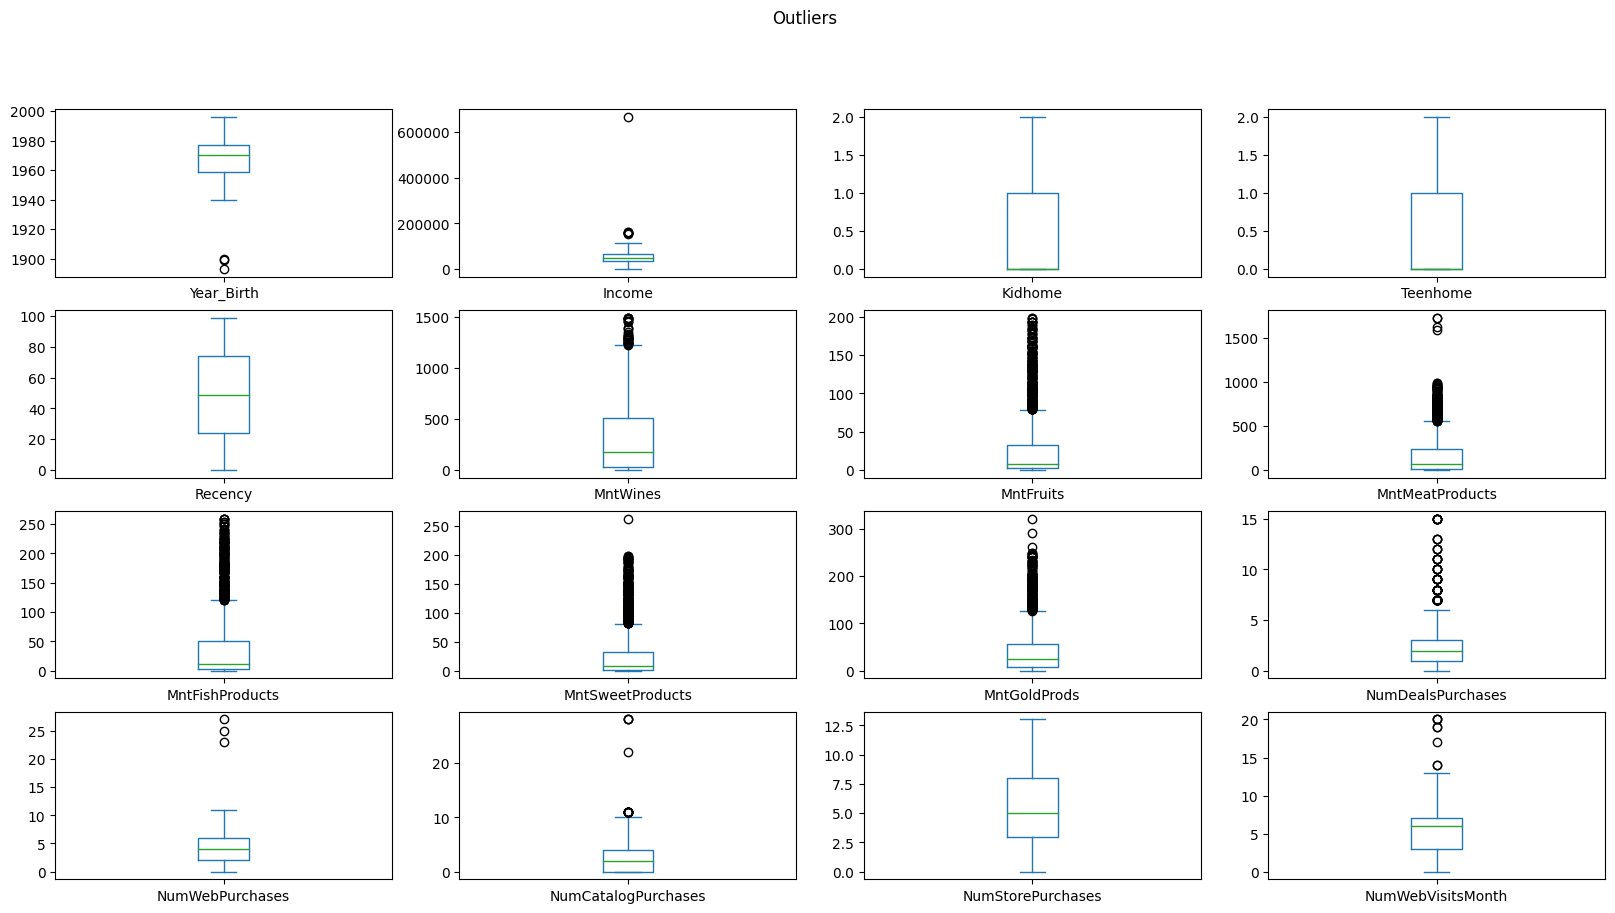

In [16]:
#plot all attributes
df_plot_outlier.plot(subplots=True, kind='box', layout=(4,4),figsize=(20,10))
plt.suptitle('Outliers')

I will remove outliers of Year Birth because they seem to be error because it is impossible for someone who was born in 1900 still alive.

In [17]:
q1=np.percentile(df2['Year_Birth'],25)
q3=np.percentile(df2['Year_Birth'],75)
iqr=q3-q1

In [18]:
q1

1959.0

In [19]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [20]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [21]:
lower_bound

1932.0

In [22]:
new_df = df2[df2.Year_Birth >= lower_bound]
new_df.Year_Birth.describe()

count    2213.000000
mean     1968.917307
std        11.700216
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [23]:
new_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


I will create some variables which are useful

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   int64         
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-nul

- Joint date, month and year of Dt_customer (for determine which time people choose to become customer)
- Total amount
- Total purchase
- AOV
- Total kids in family

In [25]:
new_df['Join_week']=new_df['Dt_Customer'].dt.weekday
new_df['Join_month']=new_df['Dt_Customer'].dt.month
new_df['Join_year']=new_df['Dt_Customer'].dt.year
new_df['Total_amount']=new_df['MntFishProducts']+new_df['MntWines']+new_df['MntMeatProducts']+new_df['MntSweetProducts']+new_df['MntGoldProds']+new_df['MntFruits']
new_df['Total_purchase']=new_df['NumDealsPurchases']+new_df['NumWebPurchases']+new_df['NumStorePurchases']+new_df['NumWebVisitsMonth']+new_df['NumCatalogPurchases']
new_df['Total_kids']=new_df['Kidhome']+new_df['Teenhome']
new_df['AOV']=new_df['Total_amount']/new_df['Total_purchase']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2213 non-null   int64         
 1   Year_Birth           2213 non-null   int64         
 2   Education            2213 non-null   object        
 3   Marital_Status       2213 non-null   object        
 4   Income               2213 non-null   int64         
 5   Kidhome              2213 non-null   int64         
 6   Teenhome             2213 non-null   int64         
 7   Dt_Customer          2213 non-null   datetime64[ns]
 8   Recency              2213 non-null   int64         
 9   MntWines             2213 non-null   int64         
 10  MntFruits            2213 non-null   int64         
 11  MntMeatProducts      2213 non-null   int64         
 12  MntFishProducts      2213 non-null   int64         
 13  MntSweetProducts     2213 non-nul

<ipython-input-25-8bd6e2aa929d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Join_week']=new_df['Dt_Customer'].dt.weekday
<ipython-input-25-8bd6e2aa929d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Join_month']=new_df['Dt_Customer'].dt.month
<ipython-input-25-8bd6e2aa929d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

We have to find out the correlation of variable by using heatmap

In [26]:
df_plot_heatmap=new_df.drop(columns=['ID'])

<ipython-input-27-c9265d164f3e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_plot_heatmap.corr(),cmap = 'RdBu')


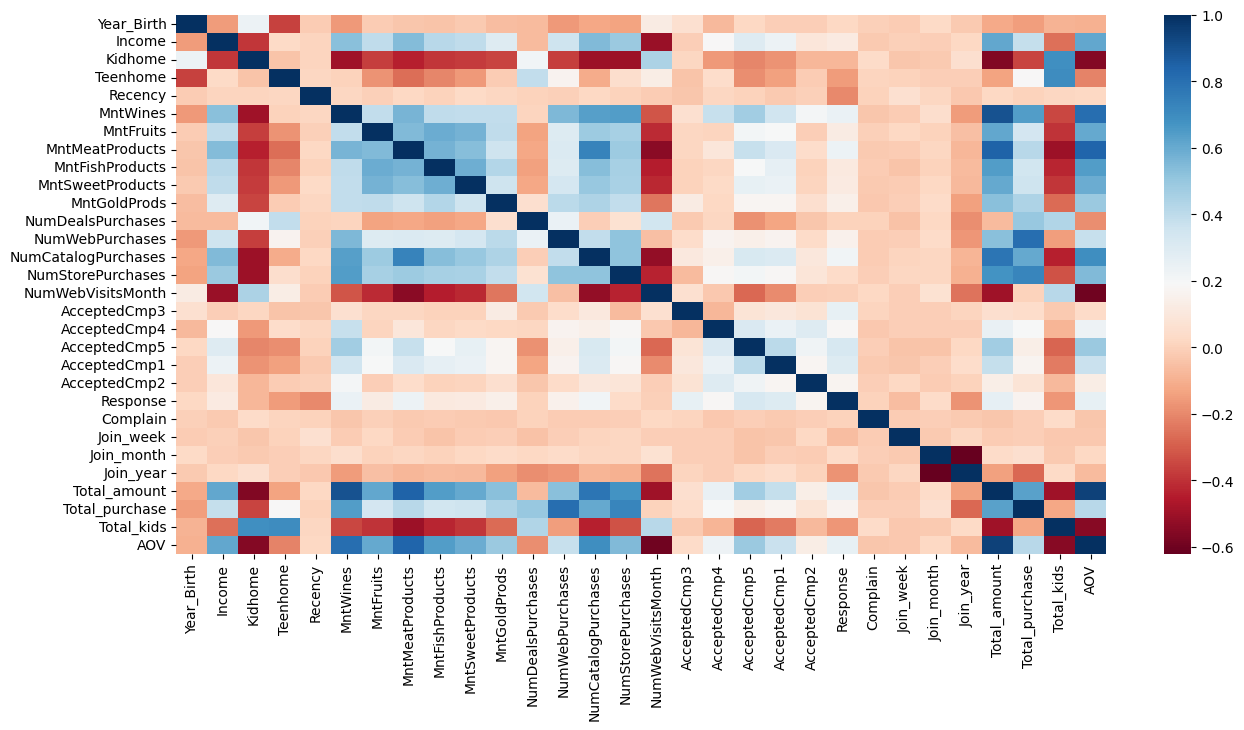

In [27]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df_plot_heatmap.corr(),cmap = 'RdBu')
plt.show()

Based on the heatmap. I figure out some insights
1. High income people tend to
- not buy frequently (low recency)
- buy wines and meats (high amount)
- not visit web frequently
- high AOV
2. People having kids tend to
- buy low amount of food
- low AOV
- buy with deals
- visit websites frequently
3. People having high AOV tend to
- not have many kids
- not visit website 
- buy through catalog and store
- buy high amount of meat and wines
- high income


In [28]:
new_df['Complain'].value_counts()

0    2193
1      20
Name: Complain, dtype: int64

It shows that this dataset is imbalanced in complaint so we cannot conclude that the more amount customer spend, the less complaint they have.

# Statistical Analysis

- What factors are significantly related to the number of store purchases?
- Fish has Omega 3 fatty acids, which are good for the brain. Accordingly, do “Married Ph.D. candidates” have a significant relation with the amount spent on fish?

In [29]:
# What factors are significantly related to the number of store purchases?
# use randome forest to predict then use importance score
#--tạo dataframe mới để chạy mô hình randomforest (đây là mô hình có độ chính xác cao và vừa phân loại vừa hồi quy)
rd_df=new_df.drop(columns=['ID','Dt_Customer'])
#--thay thế các giá trị vô cùng (nếu có) thành giá trị 0
rd_df.replace([np.inf,-np.inf],0,inplace=True)
#--chuyển cột kiểu string thành số (one-hot coding) bằng get_dummies
rd_df=pd.get_dummies(rd_df)
rd_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1970,84835,0,0,0,189,104,379,111,189,...,0,0,0,0,0,0,0,0,1,0
1,1961,57091,0,0,0,464,5,64,7,0,...,0,0,0,1,0,0,0,0,0,0
2,1958,67267,0,1,0,134,11,59,15,2,...,0,0,0,0,0,0,0,0,0,1
3,1967,32474,1,1,0,10,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1989,21474,1,0,0,6,16,24,11,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
#--import split train test function
from sklearn.model_selection import train_test_split
#--tạo dataframe train test theo chiều ngang
X=rd_df.drop(columns=['NumStorePurchases'])
y=rd_df['NumStorePurchases']
#split train test dataset
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3)
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
#--create forest having 100 trees
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
#--train the model
rg.fit(X_train, y_train)
#--test the model
y_pred=rg.predict(X_test)

In [32]:
#--use metrics to assess the model
from sklearn import metrics

print('Mean Absolute Error - MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error - MSE', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error - RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error - MAE: 0.7691792168674699
Mean Squared Error - MSE 1.318645971385542
Root Mean Squared Error - RMSE 1.1483231127977622


In [33]:
#--finding important features
imp_score=pd.Series(rg.feature_importances_,index=list(X.columns)).sort_values(ascending=False)
imp_score[:10]

Total_amount           0.402211
AOV                    0.273855
Total_purchase         0.085916
NumCatalogPurchases    0.037391
NumWebPurchases        0.035624
NumWebVisitsMonth      0.032437
MntWines               0.020388
MntGoldProds           0.012739
Income                 0.011633
NumDealsPurchases      0.009744
dtype: float64

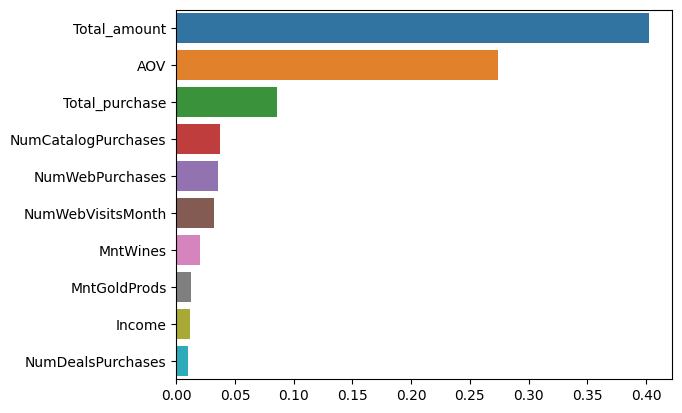

In [34]:
sns.barplot(x=imp_score[:10],y=imp_score.index[:10])
plt.show()

We can conclude that total amount is the most influenced factor on the number of store purchases.

In [35]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['MntGoldProds'], y=new_df['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.39083443502519855
Pearson p-value:  1.128338521606759e-81


- The results will display the Pearson correlation coefficient and the corresponding p-value. Pearson correlation coefficient values are in the range [-1, 1], where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no linear correlation. . P-value measures the level of statistical significance of the correlation, with a low p-value (< 0.05) indicating a statistically significant correlation.
- The above results show that r=0.39 means there is a positive correlation. However, p-value=1.12 (>0.05) so there is no statistical significance --> no correlation is confirmed --> conclusion is not correlated.


- Fish has Omega 3 fatty acids, which are good for the brain. Accordingly, do “Married Ph.D. candidates” have a significant relation with the amount spent on fish?

<ipython-input-36-29402cd6a13c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married_phd['label'] = "Married PhD"
<ipython-input-36-29402cd6a13c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_rest['label'] = "The rest"
<ipython-input-36-29402cd6a13c>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = married_phd.append(the_rest)


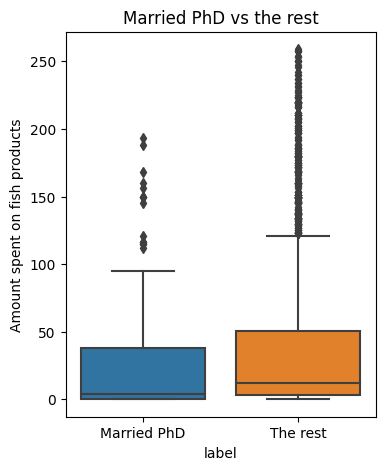

In [36]:
# divide the data into two groups: married PhD and the rest
married_phd = new_df[(new_df.Education == "PhD") & (new_df.Marital_Status == "Married")]
married_phd['label'] = "Married PhD"
the_rest = new_df[(new_df.Education != "PhD") | (new_df.Marital_Status != "Married")]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the rest")
sb.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products");

The remaining group of customers had more fish purchases on average than the Married PhD group.

In [37]:
# use t-test to test if these two groups have the same mean
from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.
pval = ttest_ind(married_phd.MntFishProducts, the_rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005045085872014597


- H0: u1=u2
- H1: u1 >< u2
- If p-value < 0.05, we reject hypothesis H0, otherwise we will accept hypothesis H0.
- According to the above results, p-value=0.005 -> reject the hypothesis H0, which is 2 unequal averages (based on the chart to know which side is bigger)

# Further Analysis

## Which marketing campaign is most successful?

In [38]:
new_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,Join_week,Join_month,Join_year,Total_amount,Total_purchase,Total_kids,AOV
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,1,0,SP,0,6,2014,1190,16,0,74.375000
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,1,0,CA,6,6,2014,577,23,0,25.086957
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,0,0,US,1,5,2014,251,13,1,19.307692
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,0,0,AUS,6,5,2014,11,11,2,1.000000
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,1,0,SP,1,4,2014,91,15,1,6.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,0,0,US,3,3,2013,689,24,1,28.708333
2236,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,0,0,SP,1,1,2013,55,13,1,4.230769
2237,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,0,0,SP,0,12,2012,309,22,1,14.045455
2238,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,0,0,IND,3,11,2012,1383,23,0,60.130435


Text(0, 0.5, 'Campaign')

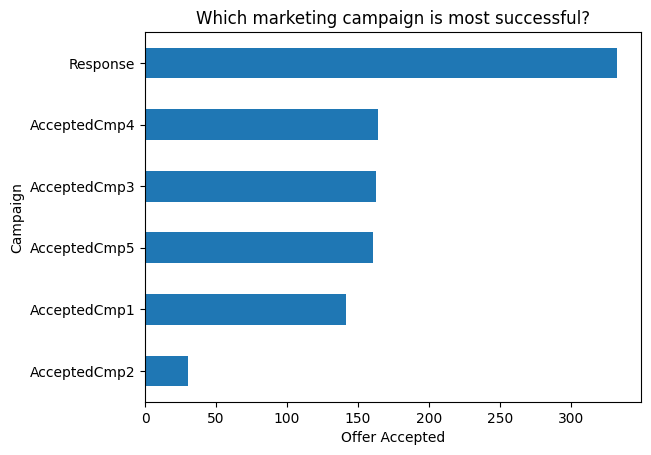

In [39]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")

## What does the average customer look like for this company? Which products are performing best?

In [40]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

<ipython-input-40-48c6eb4be850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace([np.inf, -np.inf], 0, inplace=True)


In [41]:
new_df.mean()

<ipython-input-41-b697eb9e3f41>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_df.mean()
<ipython-input-41-b697eb9e3f41>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.mean()


ID                      5586.899232
Year_Birth              1968.917307
Income                 50664.391776
Kidhome                    0.441934
Teenhome                   0.505648
Recency                   49.007682
MntWines                 305.153638
MntFruits                 26.323995
MntMeatProducts          166.962494
MntFishProducts           37.635337
MntSweetProducts          27.034794
MntGoldProds              43.911432
NumDealsPurchases          2.325350
NumWebPurchases            4.087664
NumCatalogPurchases        2.671487
NumStorePurchases          5.805242
NumWebVisitsMonth          5.321735
AcceptedCmp3               0.073656
AcceptedCmp4               0.074108
AcceptedCmp5               0.072752
AcceptedCmp1               0.064166
AcceptedCmp2               0.013556
Response                   0.150474
Complain                   0.009038
Join_week                  2.986444
Join_month                 6.463624
Join_year               2013.028016
Total_amount             607

Each customer:
- has an annual income of 52200 dollars
- had purchased 49 days ago
- has an AOV of 26.8 dollars
- has spent 605 dollars
- has purchased 20 times
- became a customer in mid-June
- became a customer on Thursday
- spent most on wines(300 dollars) and then meat products(165 dollars)
- spent least on fruit (26 dollars) and sweet products(27 dollars)

## Which marketing channels are underperforming?

Text(0, 0.5, 'Channel')

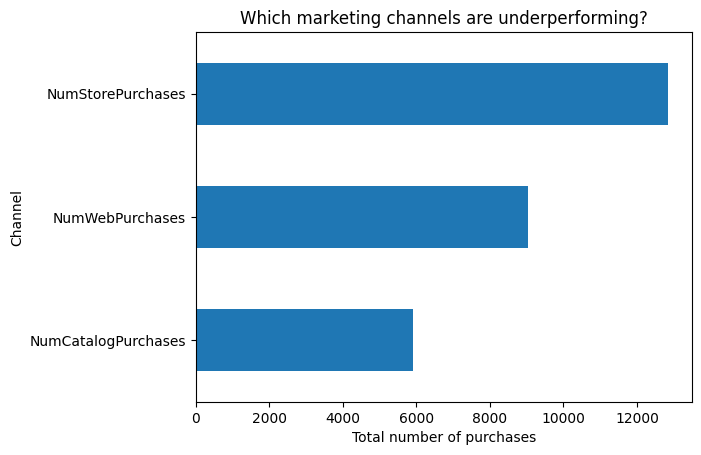

In [42]:
new_df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

Catalog is the most underperforming channel.

# Conclusion

1. People having high AOV tend to
- not have many kids
- not visit website
- buy through catalog and store
- buy high amount of meat and wines
- high income
2. Total amount is the most influenced factor on the number of store purchases
3. The remaining customers had more fish purchases on average than the Married PhD group.
4. The last campaign is the most successful
5. Catalog is the most underperforming channel.